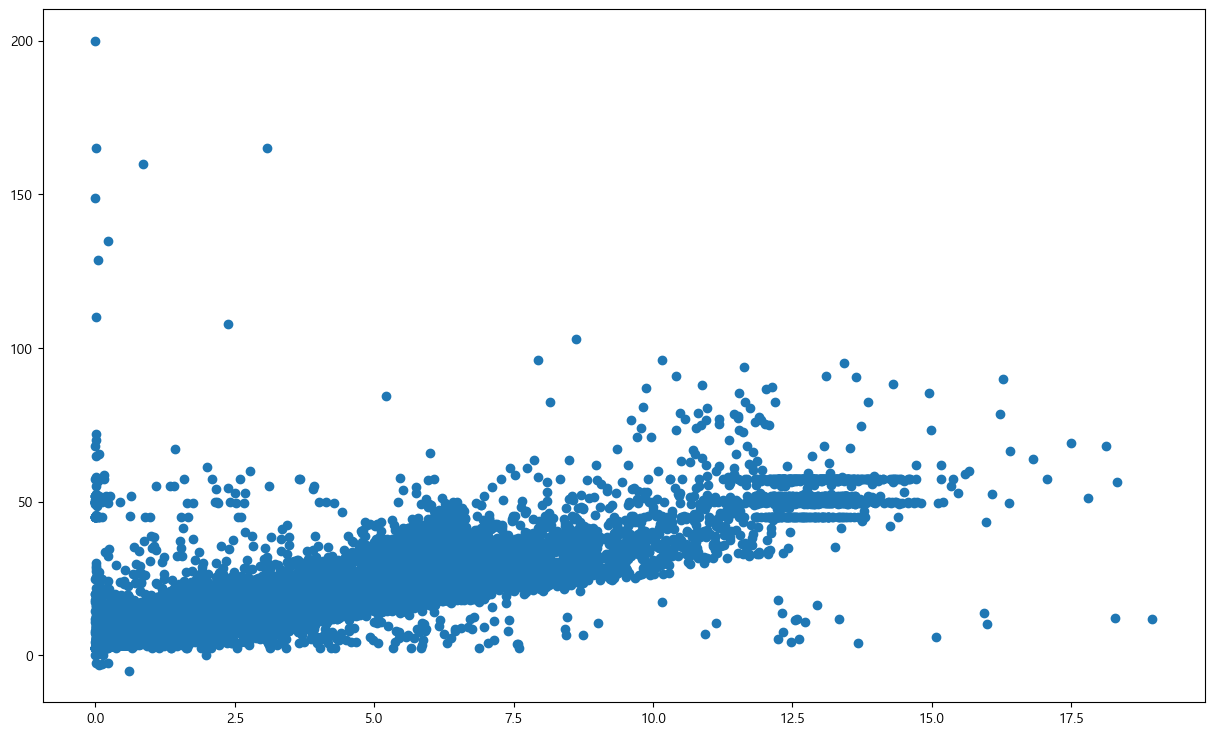

In [138]:
import numpy as ns
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv(r"C:\Users\302-28\git-repo\train.csv")

pickup_longitude=df['pickup_longitude']
pickup_latitude=df['pickup_latitude']
dropoff_longitude=df['dropoff_longitude']
dropoff_latitude=df['dropoff_latitude']

def outlier_index():
    i = 0
    idx_zero_distance = []    
    zipped = zip(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for x, y, _x, _y in zipped:
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)
        
        i+=1        
            
    total_indexremove = list((idx_zero_distance))
    
    return total_indexremove

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

remove_index = outlier_index()
df = remove_outlier(df,remove_index)
df_fare_amount=df['fare_amount']

def haversine(lat1, lon1, lat2, lon2):
    # 위도, 경도를 라디안으로 변환
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine 공식을 사용하여 거리 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    # 지구의 반지름 (단위: 마일)
    R = 3958.8  # 마일 단위
    
    # 거리 계산 (단위: 마일)
    distance = R * c
    return distance

df['distance'] = df.apply(lambda df: haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude']), axis=1)
df = df[df['distance'] < 20]
plt.rc('figure',figsize=(15,9))
plt.scatter(df['distance'],df['fare_amount'])
plt.show()

In [142]:
df[df['distance'] > 5000]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance


[3.71177681]
[3.59679352]


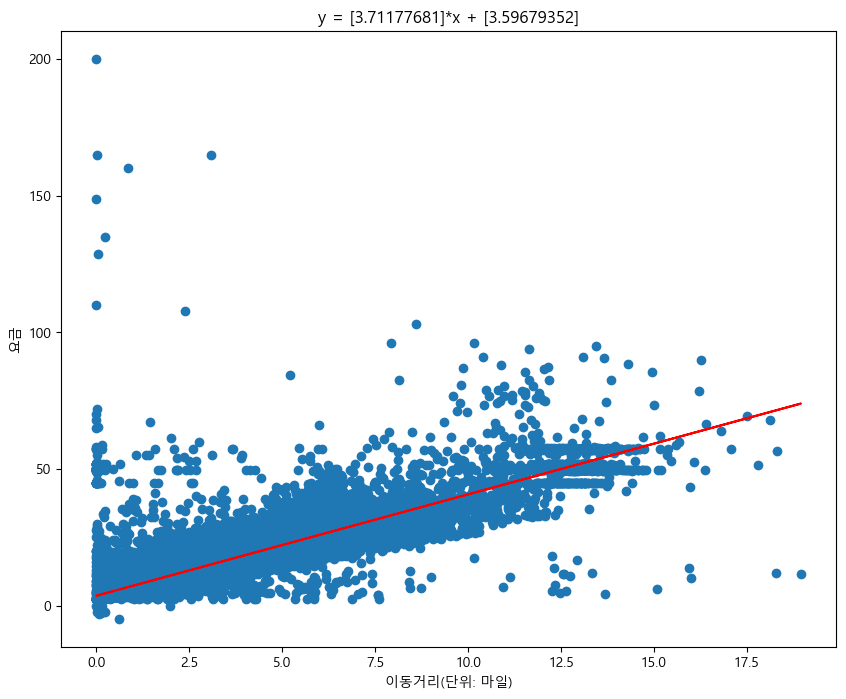

In [139]:
X = df.distance.values
Y = df.fare_amount.values

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, Y)

# r 계수
print (lr.coef_[0])

# y 절편
print (lr.intercept_)

NewY = lr.coef_[0]*X +lr.intercept_

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X, Y)
ax.set_xlabel('이동거리(단위: 마일)')
ax.set_ylabel('요금')

plt.plot(X, NewY, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [140]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # 위도, 경도를 라디안으로 변환
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine 공식을 사용하여 거리 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    # 지구의 반지름 (단위: 마일)
    R = 3958.8  # 마일 단위
    
    # 거리 계산 (단위: 마일)
    distance = R * c
    return distance

# 예시: 두 지점 (위도, 경도)
lat1, lon1 = 38.754215, -70.140793  # 첫 번째 지점 (위도, 경도)
lat2, lon2 = 40.646969, -73.78978   # 두 번째 지점 (위도, 경도)

# 거리 계산
distance = haversine(lat1, lon1, lat2, lon2)

print(f"두 지점 간의 거리는 {distance:.2f} 마일입니다.")


두 지점 간의 거리는 233.92 마일입니다.


In [141]:
max_fare_row = df[df['fare_amount'] == df['fare_amount'].max()]
max_fare_row

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
28373,2012-02-26 03:24:00.000000155,200.0,2012-02-26 03:24:00 UTC,-73.954922,41.391042,-73.954918,41.391042,1,0.000207
